In [1]:
# setup을 수행함 + 위치 설정

import numpy as np
import sys
sys.path.append('../')
from cycada.data.data_loader import get_dataset
import PIL.Image as Image
from os.path import join
import os

/Users/gwanpil/opt/anaconda3/envs/stock_prediction/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torchvision import datasets

mnist_dataset = datasets.MNIST('/Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/', train=True, transform=None, 
                               target_transform=None, download=True)
svhn_dataset = datasets.SVHN('/Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/svhn/', split='train', transform=None, 
                             target_transform=None, download=True)

100%|████████████████████████████| 9912422/9912422 [00:01<00:00, 7452909.22it/s]


Extracting /Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 18185812.01it/s]

Extracting /Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/MNIST/raw




100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 6211679.50it/s]


Extracting /Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 6229734.72it/s]


Extracting /Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/mnist/MNIST/raw



100%|████████████████████████| 182040794/182040794 [00:21<00:00, 8632465.16it/s]


In [3]:
outdir = '/Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/cyclegan_data/svhn2mnist'
# SVHN->MNIST: convert to 32x32x3 images

os.makedirs(join(outdir, 'trainB/images'), exist_ok=True)
with open(join(outdir, 'trainB/labels.txt'), 'w') as label_file:
    for i in range(len(mnist_dataset)):
        img = Image.fromarray(mnist_dataset.train_data[i].numpy())
        img = img.resize([32,32])
        img = img.convert('RGB')
        img.save(join(outdir, 'trainB/images', '{:d}.png'.format(i)))
        label_file.write('{:d} {:d}\n'.format(i, mnist_dataset.train_labels[i]))
     

os.makedirs(join(outdir, 'trainA/images'), exist_ok=True)
svhn_labels = svhn_dataset.labels.flatten()
with open(join(outdir, 'trainA/labels.txt'), 'w') as label_file:
    for i in range(len(svhn_dataset)):
        img = Image.fromarray(svhn_dataset.data[i].transpose(1,2,0))
        img.save(join(outdir, 'trainA/images', '{:d}.png'.format(i)))
        label_file.write('{:d} {:d}\n'.format(i, svhn_labels[i]))

/Users/gwanpil/opt/anaconda3/envs/stock_prediction/lib/python3.7/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/gwanpil/opt/anaconda3/envs/stock_prediction/lib/python3.7/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [146]:
# CUDA_VISIBLE_DEVICES=1 python train.py --name experiment_name 
# --dataroot path_to_gta2cityscape --resize_or_crop=crop --loadSize=360 --fineSize=360 --identity 1.0 
# --which_model_netD n_layers --n_layers_D 3

In [147]:
#CUDA_VISIBLE_DEVICES=1 python cyclegan/train.py --name test_svhn2mnist 
# --dataroot /x/jhoffman/cyclegan_data/svhn2mnist/ --resize_or_crop=None 
# --loadSize=32 --fineSize=32 --which_model_netD n_layers --n_layers_D 3 --no_flip
# --model cycle_gan --lambda_A 1 --lambda_B 1 --identity 1.0

In [6]:
import matplotlib.pyplot as plt

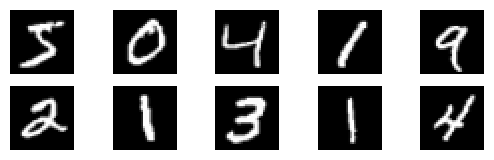

In [7]:
dirname = join(outdir, 'trainB/images')
for i in range(10):
    img = Image.open(join(dirname, '{:d}.png'.format(i)))

    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.grid('off')
    plt.axis('off')

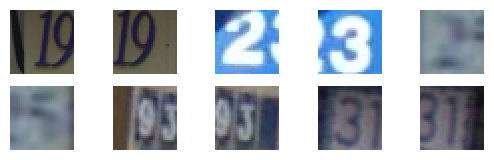

In [8]:
dirname = join(outdir, 'trainA/images')
for i in range(10):
    img = Image.open(join(dirname, '{:d}.png'.format(i)))
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.grid('off')
    plt.axis('off')

In [9]:
y = svhn_dataset.labels

Text(0.5, 1.0, 'P(Y) for SVHN')

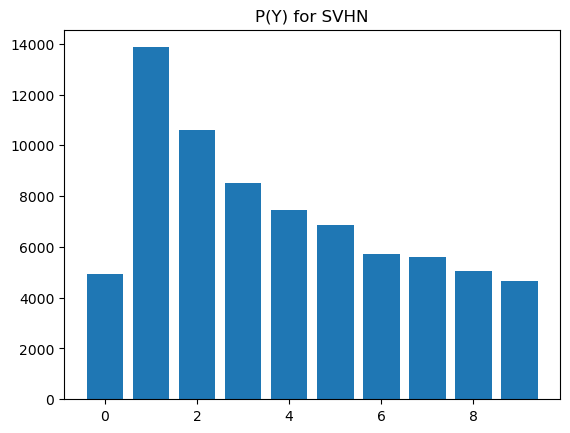

In [10]:
count,bins = np.histogram(y.squeeze(), bins=10)
plt.bar(range(10), count); plt.title('P(Y) for SVHN')

In [11]:
min_num = min(count)
ind = np.zeros((10,min_num), dtype=int)
for i in np.unique(y):
    binary_ind = np.where(y.squeeze() == i)[0]
    np.random.shuffle(binary_ind)
    
    ind[i-1,:] = binary_ind[:min_num]

ind = ind.flatten()
np.random.shuffle(ind)
y_new = y[ind]

Text(0.5, 1.0, 'P(Y) SVHN balanced')

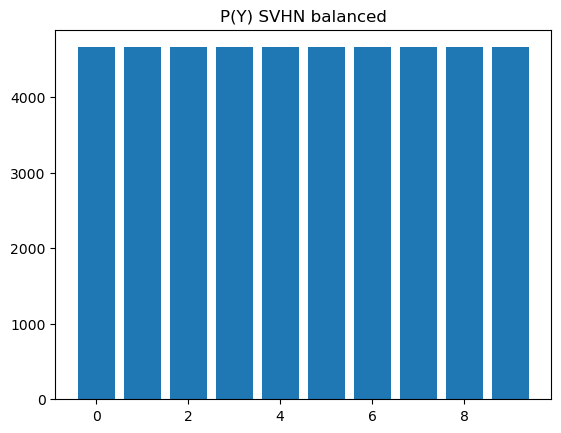

In [12]:
count_new,_ = np.histogram(y_new, bins=10)
plt.bar(range(10), count_new); plt.title('P(Y) SVHN balanced')

In [13]:
with open('/Users/gwanpil/Documents/GitHub/cycada_release/x/jhoffman/cyclegan_data/svhn2mnist/trainA/labels.txt', 'r') as f:
    data = f.read().splitlines()

parse = np.array([(int(x.split(' ')[0]), int(x.split(' ')[1])) for x in data])
d = dict(parse)